# Brain Computer Interface

### Imports

In [1]:
import mne
from mne.decoding import CSP
import matplotlib.pyplot as plt

### Load data sets

In [2]:
data_loo = mne.io.read_epochs_eeglab(input_fname = "./Recording/Subject_11_H_AEP_Run_01.set")
data_tst = mne.io.read_epochs_eeglab(input_fname = "./Recording/Subject_10_H_AEP_Run_01.set")

Extracting parameters from c:\Users\33695\Documents\github\Brain_computer_interface\Recording\Subject_11_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\33695\Documents\github\Brain_computer_interface\Recording\Subject_10_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\33695\AppData\Local\Temp\ipykernel_37144\802184238.py:1: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data_loo = mne.io.read_epochs_eeglab(input_fname = "./Recording/Subject_11_H_AEP_Run_01.set")
C:\Users\33695\AppData\Local\Temp\ipykernel_37144\802184238.py:2: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data_tst = mne.io.read_epochs_eeglab(input_fname = "./Recording/Subject_10_H_AEP_Run_01.set")


# Analyse du dataset

In [3]:
print(data_loo.info, data_tst.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
> <Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>


By analysing the EEG data, there are in both recordings:
* 8 EEG channels
* no high-pass filtering
* sampling frequency is 256 Hz
* no channel is bad (because "bads: []")

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\33695\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


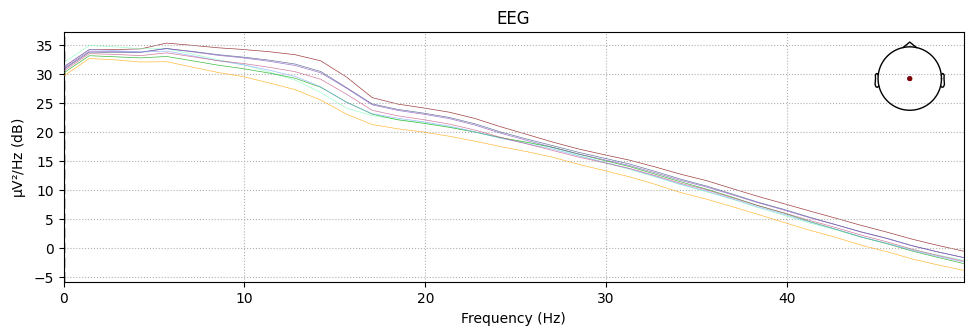

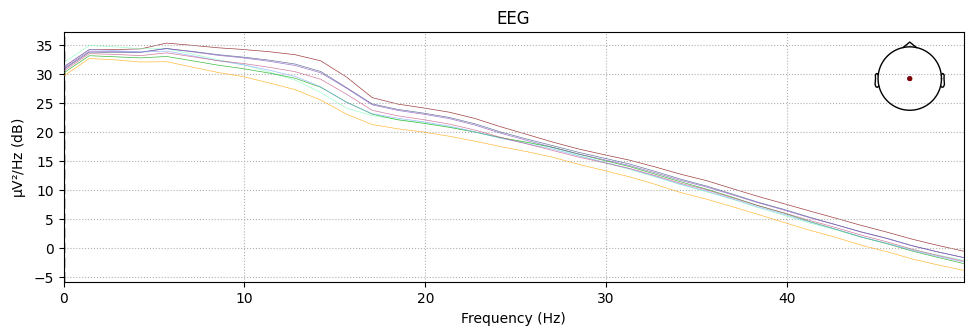

In [4]:
#plot the EEG
data_loo.compute_psd(fmax = 50).plot()

Then, the project invites us to filter the data between 12 and 30 Hz.

In [5]:
# band-pass filtering in the range 12 Hz - 30 Hz
data_loo.filter(12., 30., fir_design='firwin')
data_tst.filter(12., 30., fir_design='firwin')

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 283 samples (1.105 s)



C:\Users\33695\AppData\Local\Temp\ipykernel_37144\1121013964.py:2: RuntimeWarning: filter_length (283) is longer than the signal (180), distortion is likely. Reduce filter length or filter a longer signal.
  data_loo.filter(12., 30., fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.0s


Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 283 samples (1.105 s)



[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.2s
C:\Users\33695\AppData\Local\Temp\ipykernel_37144\1121013964.py:3: RuntimeWarning: filter_length (283) is longer than the signal (180), distortion is likely. Reduce filter length or filter a longer signal.
  data_tst.filter(12., 30., fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Paralle

Number of events,480
Events,0: 4201: 60
Time range,-0.102 – 0.598 s
Baseline,off


In [6]:
print(data_loo, data_tst)

<EpochsEEGLAB |  480 events (all good), -0.101562 – 0.597656 s, baseline off, ~5.3 MB, data loaded,
 '0': 420
 '1': 60> <EpochsEEGLAB |  480 events (all good), -0.101562 – 0.597656 s, baseline off, ~5.3 MB, data loaded,
 '0': 420
 '1': 60>


The two recordings have 480 measures, 420 of which are Hits and 60 of which are NoHits.
Hits are associated to 1 and NoHits to 0.

Using matplotlib as 2D backend.


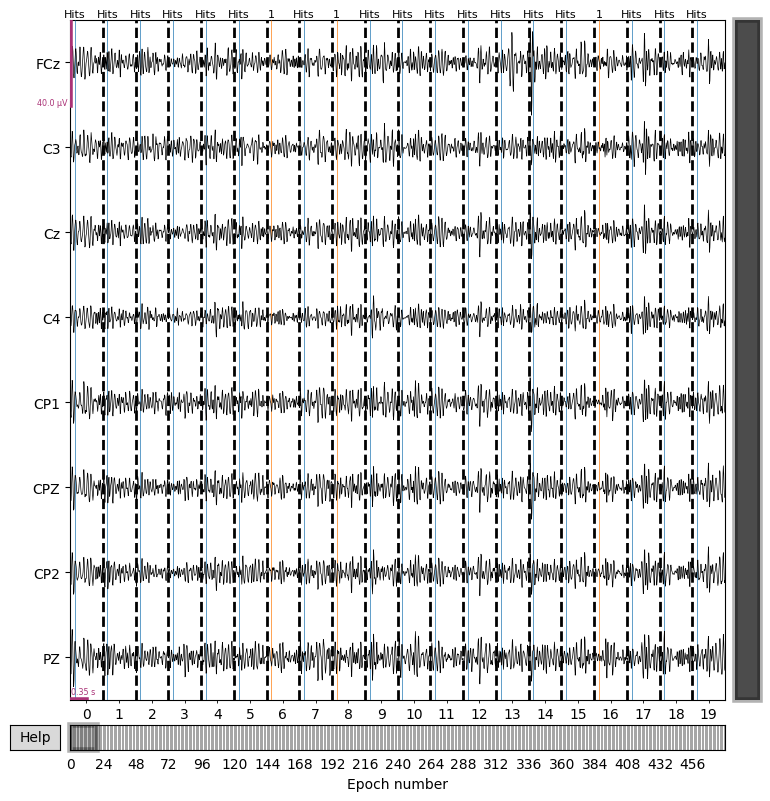

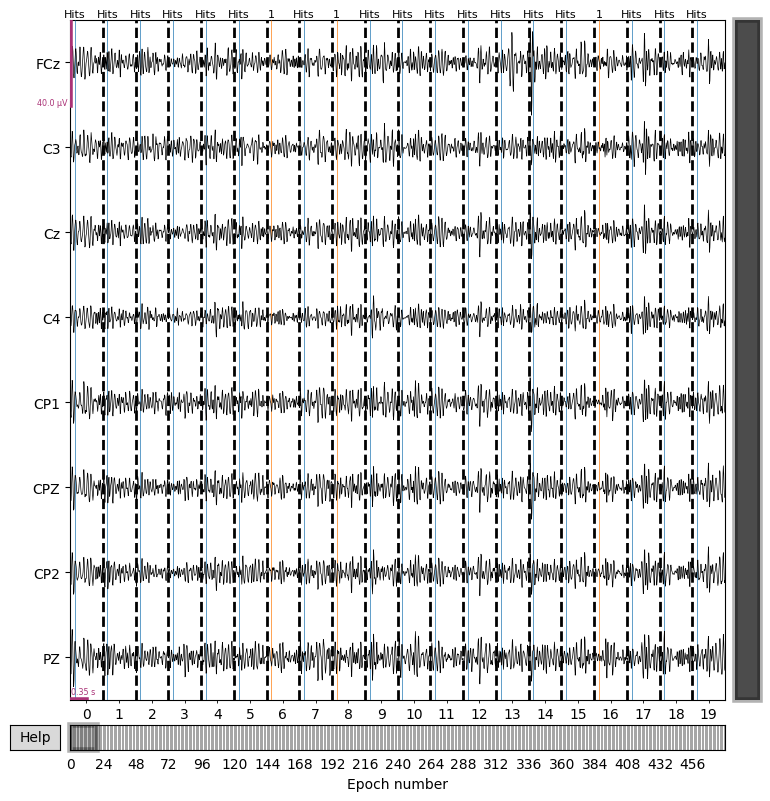

In [7]:
#creation of events
events_num = data_loo.events
event_id = {'Hits': 1, 'NoHits': 0}

#plot to observe the hits in each canal
data_loo.plot(butterfly=False, events=events_num, event_id=event_id)

### Creation of the variables

The first file will be analyzed in leave one out.

In [8]:
t = data_loo.times
x = data_loo.get_data()
y = data_loo.events[:,2]
x_csp_average = CSP(n_components=6, transform_into='average_power').fit_transform(x, y)

print(x_csp_average)

Computing rank from data with rank=None
    Using tolerance 5.2e-06 (2.2e-16 eps * 8 dim * 2.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2e-06 (2.2e-16 eps * 8 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
[[-0.91984827 -1.0994891  -0.44389245 -1.09881256 -0.94996168 -0.76107601]
 [-1.65260823 -0.99689012 -1.42181133 -1.52481675 -0.90926574 -0.50535833]
 [-0.74349563 -1.20251824 -0.81334268 -1.41801998 -0.35489059 -1.37815906]
 ...
 [-0.44168215 -0.8208704  -0.60366187 -0.8010683  -1.10877649 -0.92688878]
 [-0.29410073 -1.16009264 -0.45698509 -0.59648567 -1.54305474 -0.25477579]
 [ 0.01988464 -0.30213155 -0.87293284  0.3407486

After using CSP, x_csp_average is flatten, X is normalized to be sure it is composed of comparable amplitudes between channels

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x_csp_average)

### Training the models

In [11]:
# Imports to analyse models performances
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Define a function to plot the confusion matrix
def plot_confusion_matrix(matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, xticklabels=["NoHits", "Hits"], yticklabels=["NoHits", "Hits"], annot=True)
    plt.xlabel("Predictions")
    plt.ylabel("Reals")
    plt.title("Confusion matrix")
    plt.show()

In [13]:
# Imports to do the LeaveOneOut procedure
from sklearn.model_selection import LeaveOneOut

#### Model 1 : RandomForestClassifier

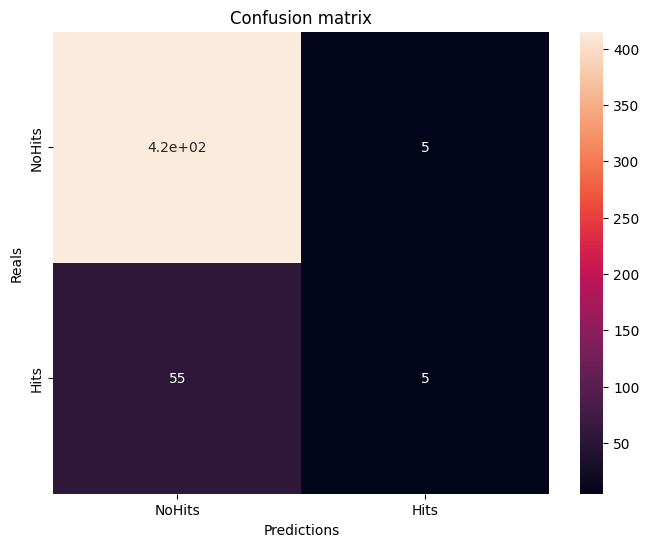

Accuracy of Random Forest : 0.875


In [15]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
loo = LeaveOneOut()
y_true = []
y_pred = []

for i_train, j_test in loo.split(X):
    X_train_loo, X_val_loo = X[i_train], X[j_test]
    y_train_loo, y_val_loo = y[i_train], y[j_test]

    random_forest_model.fit(X_train_loo, y_train_loo)
    y_val_pred = random_forest_model.predict(X_val_loo)

    y_true.append(y_val_loo[0]) 
    y_pred.append(y_val_pred[0])

confusion_randomforest = confusion_matrix(y_true, y_pred)
accuracy_randomforest = accuracy_score(y_true, y_pred)

plot_confusion_matrix(confusion_randomforest)
print("Accuracy of Random Forest :", accuracy_randomforest)

The model has a predictive power because the accuracy is near 90% so it can distinguish between certain classes, but there are a significant number of errors.

* True positives (TP): 1
* False positives (FP): 5
* True negatives (TN): 331
* False negative (FN): 47

Most errors are false negatives: in other words, the model fails to detect the brain's response to a hit.
This result seems to be explained by the fact that there is an imbalance between the classes in the dataset. The minority class is misclassified.

#### Model 2 : Support Vector Machine

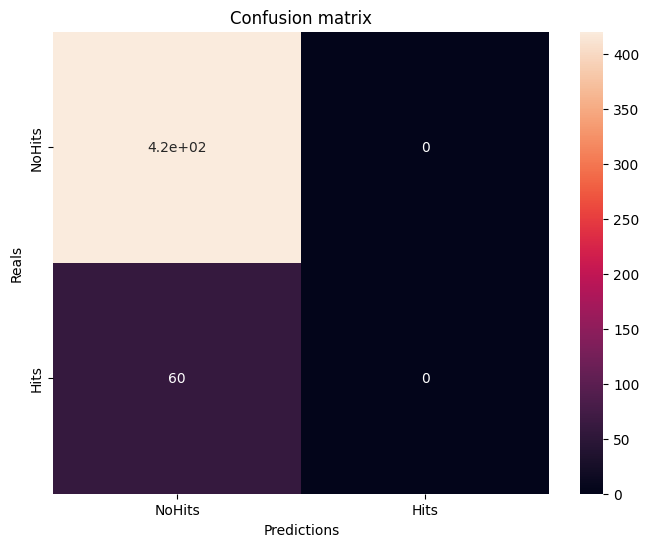

Accuracy of SVC : 0.875


In [16]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear')
loo = LeaveOneOut()
y_true = []
y_pred = []

for i_train, j_test in loo.split(X):
    X_train_loo, X_val_loo = X[i_train], X[j_test]
    y_train_loo, y_val_loo = y[i_train], y[j_test]

    svc_model.fit(X_train_loo, y_train_loo)
    y_val_pred = svc_model.predict(X_val_loo)

    y_true.append(y_val_loo[0]) 
    y_pred.append(y_val_pred[0])

confusion_svc = confusion_matrix(y_true, y_pred)
accuracy_svc = accuracy_score(y_true, y_pred)

plot_confusion_matrix(confusion_svc)
print("Accuracy of SVC :", accuracy_svc)

Results are same as Random Forest in term of accuracy because most of the dataset is from the class NoHit. 
However this model seems to never detect Hits.

#### Model 3 : Gradient Boosting

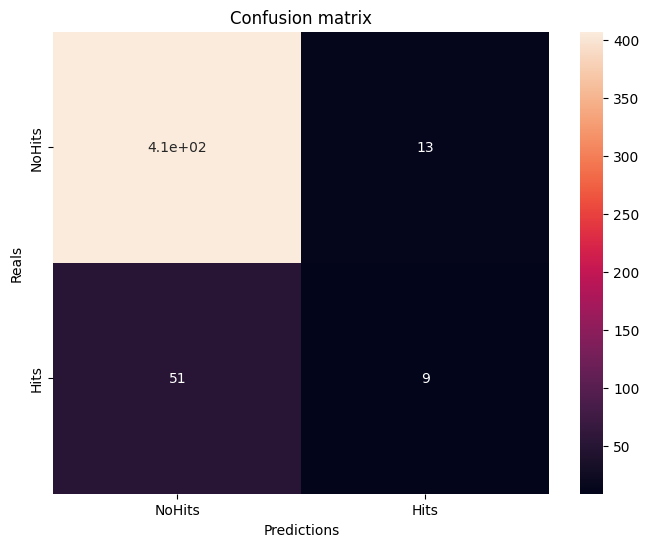

Accuracy of Gradient Boosting : 0.8666666666666667


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier()
loo = LeaveOneOut()
y_true = []
y_pred = []

for i_train, j_test in loo.split(X):
    X_train_loo, X_val_loo = X[i_train], X[j_test]
    y_train_loo, y_val_loo = y[i_train], y[j_test]

    gradient_boosting_model.fit(X_train_loo, y_train_loo)
    y_val_pred = gradient_boosting_model.predict(X_val_loo)

    y_true.append(y_val_loo[0]) 
    y_pred.append(y_val_pred[0])

confusion_gradient_boosting = confusion_matrix(y_true, y_pred)
accuracy_gradient_boosting = accuracy_score(y_true, y_pred)

plot_confusion_matrix(confusion_gradient_boosting)
print("Accuracy of Gradient Boosting :", accuracy_gradient_boosting)

The model Gradient Boosting gets results similare to Random Forest.
However, this model predicts more hits even though it therefore makes more prediction errors on this class

#### Model 4: AdaBoost model

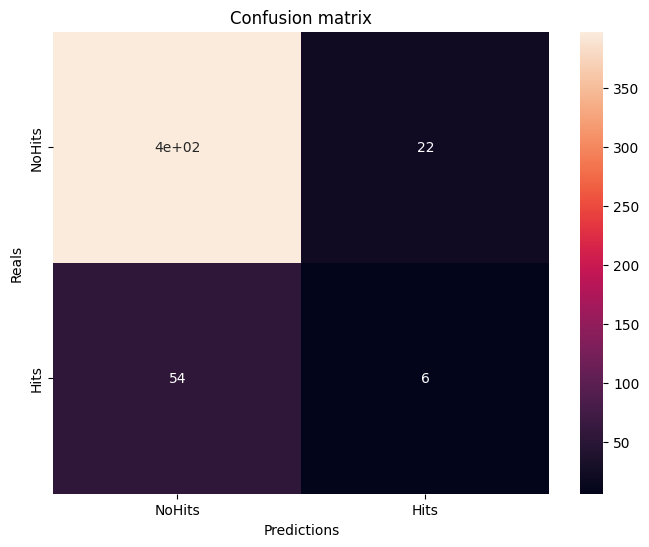

Accuracy of Adaboost : 0.8416666666666667


In [18]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier()
loo = LeaveOneOut()
y_true = []
y_pred = []

for i_train, j_test in loo.split(X):
    X_train_loo, X_val_loo = X[i_train], X[j_test]
    y_train_loo, y_val_loo = y[i_train], y[j_test]

    adaboost_model.fit(X_train_loo, y_train_loo)
    y_val_pred = adaboost_model.predict(X_val_loo)

    y_true.append(y_val_loo[0]) 
    y_pred.append(y_val_pred[0])

confusion_adaboost = confusion_matrix(y_true, y_pred)
accuracy_adaboost = accuracy_score(y_true, y_pred)

plot_confusion_matrix(confusion_adaboost)
print("Accuracy of Adaboost :", accuracy_adaboost)

Adaboost model has a predict power too. Unfortunately, the model realizes a lot of bad predictions of Hits (more than XGBoost).

#### Model 5 : VotingClassifier 

The last model is a Voting Classifier composed of the tree models adaboost, random forest and xgboost. (SVC is banned because not seems to have predict power)

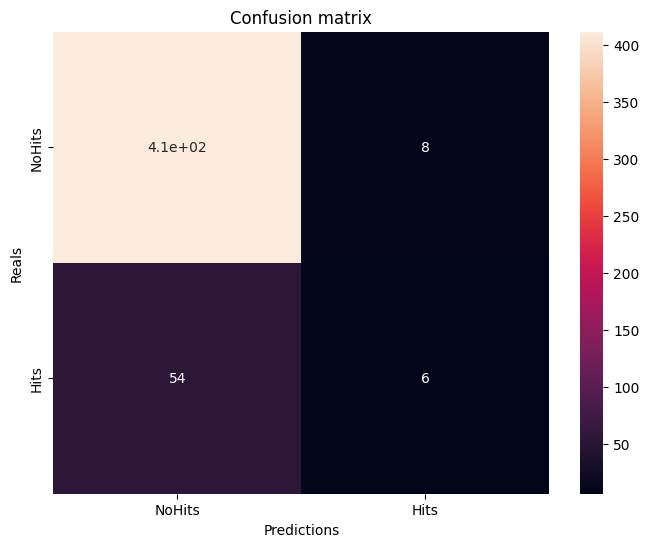

Accuracy of voting : 0.8708333333333333


In [20]:
from sklearn.ensemble import VotingClassifier

adaboost_model = AdaBoostClassifier()
random_forest_model = RandomForestClassifier()
xgboost_model = GradientBoostingClassifier()

voting_model = VotingClassifier(estimators=[
    ('AdaBoost', adaboost_model),
    ('Random Forest', random_forest_model),
    ('XGBoost', xgboost_model)
], voting='soft')

loo = LeaveOneOut()
y_true = []
y_pred = []

for i_train, j_test in loo.split(X):
    X_train_loo, X_val_loo = X[i_train], X[j_test]
    y_train_loo, y_val_loo = y[i_train], y[j_test]

    voting_model.fit(X_train_loo, y_train_loo)
    y_val_pred = voting_model.predict(X_val_loo)

    y_true.append(y_val_loo[0]) 
    y_pred.append(y_val_pred[0])

confusion_voting = confusion_matrix(y_true, y_pred)
accuracy_voting = accuracy_score(y_true, y_pred)

plot_confusion_matrix(confusion_voting)
print("Accuracy of voting :", accuracy_voting)

### Model kept

Finally, the Voting classifier model seems to have the best results, even if they are close to those of random forest and Gradient Boosting. Taking the Adaboost model out of the 3 models allows us to maintain a Hit prediction trend, unlike the SVM model.
So, the objective will be to predict hits on the second recording, the Voting model is retained. 
If the objective was to achieve the fewest bad hit predictions, the Random Forest model would seem to be better.

In [22]:
#Training the model chosen on the whole dataset

adaboost_model = AdaBoostClassifier()
random_forest_model = RandomForestClassifier()
xgboost_model = GradientBoostingClassifier()

Classifier = VotingClassifier(estimators=[
    ('AdaBoost', adaboost_model),
    ('Random Forest', random_forest_model),
    ('XGBoost', xgboost_model)
], voting='soft')

Classifier.fit(X, y)

VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()),
                             ('Random Forest', RandomForestClassifier()),
                             ('XGBoost', GradientBoostingClassifier())],
                 voting='soft')

In [23]:
#Save the model
from joblib import dump

dump(Classifier, 'EGG_Classifier.joblib')

['EGG_Classifier.joblib']

### Testing the model on the second file

In [24]:
#create X_tst and y_tst
t = data_tst.times
x = data_tst.get_data()
y_tst = data_tst.events[:,2]
x_csp_average = CSP(n_components=6, transform_into='average_power').fit_transform(x, y_tst)
scaler = StandardScaler()
X_tst = scaler.fit_transform(x_csp_average)

Computing rank from data with rank=None
    Using tolerance 4.6e-06 (2.2e-16 eps * 8 dim * 2.6e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-06 (2.2e-16 eps * 8 dim * 9.9e+08  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.


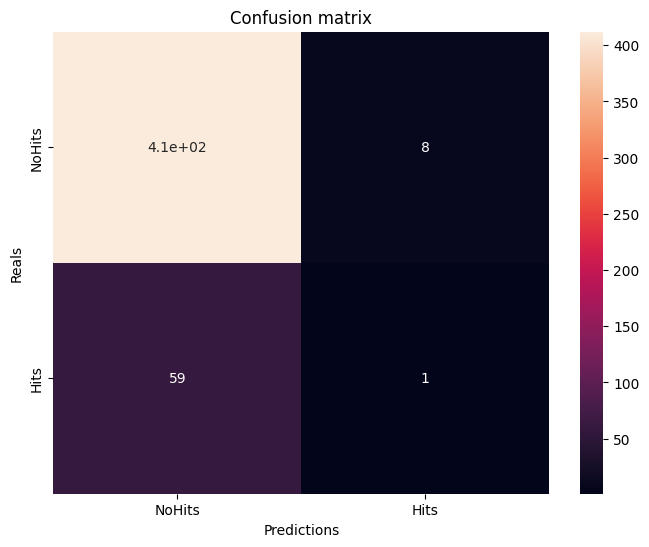

Accuracy of the final model: 0.8604166666666667


In [25]:
y_pred = Classifier.predict(X_tst)

confusion = confusion_matrix(y_tst, y_pred)
accuracy = accuracy_score(y_tst, y_pred)

plot_confusion_matrix(confusion)
print("Accuracy of the final model:", accuracy)

### Conclusion

The model chosen was trained on a dataset with ***a strong imbalance between classes***. As a result, the Hit class predictions are very poor on the training set, as shown by the various confusion matrices.
The prediction on the second dataset leads to ***an accuracy quite similar*** to the training set.
However, only one Hit was well predicted out of the 60, which makes ***the model very inefficient*** despite the fact that we chose models that were most likely to "try" to predict Hits.

To obtain better results, we would need to review the dataset: perhaps increase its size, treat the 8 channels differently and try to balance the two classes in the dataset.